In [29]:
#pip install pandas

In [30]:
#pip install matplotlib

In [31]:
#import the librarys
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#read the csv file and set the columns names
data = pd.read_csv('log_cortes.csv', names=['date', 'corte'])
data.head()

,date,corte
0,2024-12-30 23:06:26,278
1,2024-12-31 16:37:56,1550
2,2024-12-31 18:04:53,5217
3,2025-01-01 20:50:06,96313
4,2025-01-03 22:55:37,180331


In [33]:
#transfor the data type of the column 'data' to datetime
data['date'] = pd.to_datetime(data['date'])
#transform the data type of the column 'corte' from milliseconds to minutes
data['corte'] = data['corte'] / 60000
data.head()

,date,corte
0,2024-12-30 23:06:26,0.004633
1,2024-12-31 16:37:56,0.025833
2,2024-12-31 18:04:53,0.086950
3,2025-01-01 20:50:06,1.605217
4,2025-01-03 22:55:37,3.005517


In [34]:
data.describe()

,date,corte
count,45,45.000000
mean,2025-02-06 23:53:25.800000,2.218201
min,2024-12-30 23:06:26,0.003683
25%,2025-01-21 21:00:16,0.179067
50%,2025-02-12 21:11:23,1.091700
75%,2025-02-20 13:32:55,2.452483
max,2025-03-10 23:46:34,19.174200
std,NaN,3.803687


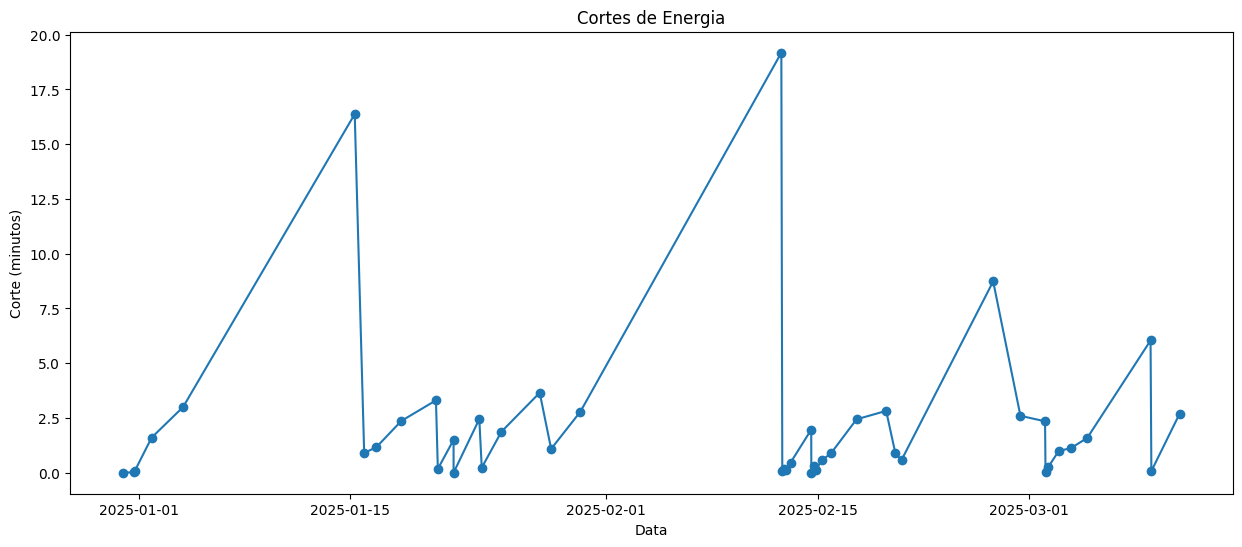

In [35]:
#create a plot with the data and add the points
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['corte'], marker='o')
plt.title('Cortes de Energia')
plt.xlabel('Data')
plt.ylabel('Corte (minutos)')
plt.show()
#data.plot(x='date', y='corte', figsize=(15, 6))

In [36]:
#mean in the last 30 days
data['date'] = pd.to_datetime(data['date'])
data['date'].max()
data['date'].min()
data['date'].max() - data['date'].min()
data['date'].max() - pd.Timedelta(days=30)
data[data['date'] > data['date'].max() - pd.Timedelta(days=30)]['corte'].mean()


np.float64(2.1993948717948717)

In [37]:
#mean in the last 7 days
data[data['date'] > data['date'].max() - pd.Timedelta(days=7)]['corte'].mean()


np.float64(2.602875)

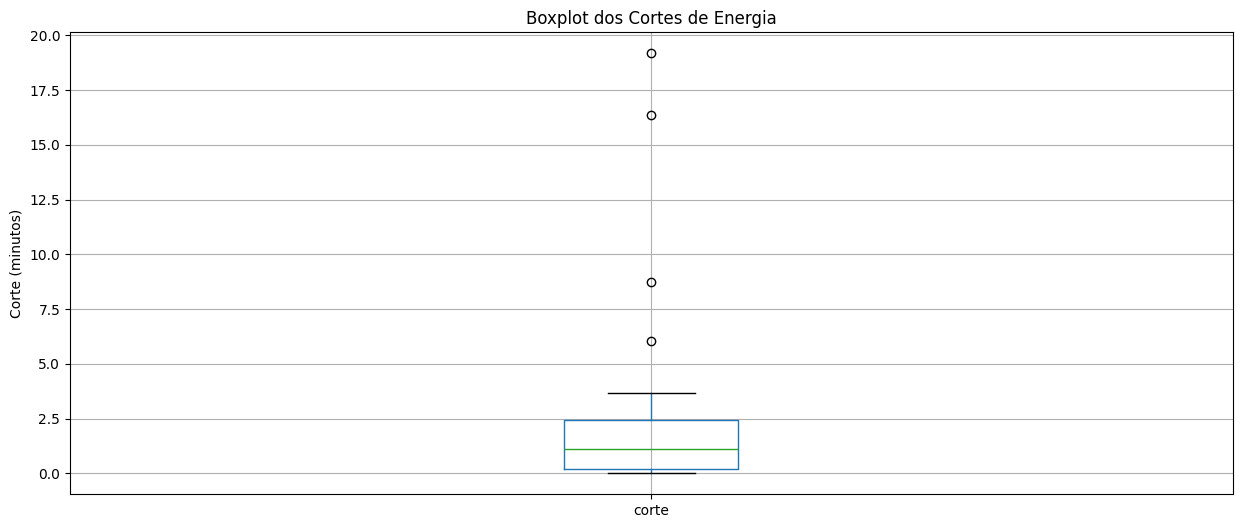

In [38]:
#boxplot of the data
plt.figure(figsize=(15, 6))
data.boxplot(column='corte')
plt.title('Boxplot dos Cortes de Energia')
plt.ylabel('Corte (minutos)')
plt.show()


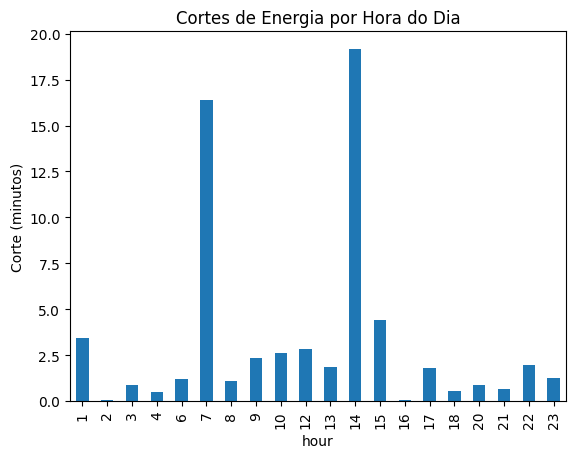

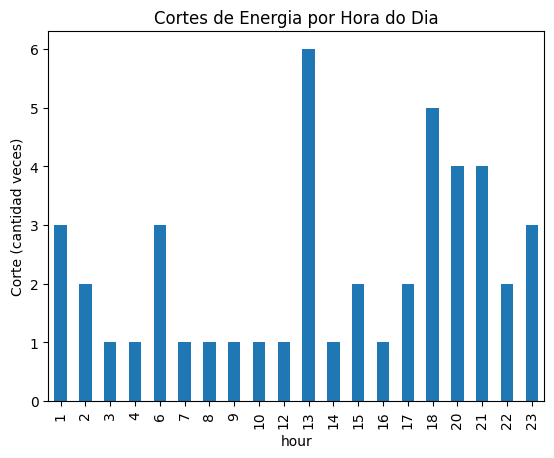

In [39]:
#moment of the day
data['hour'] = data['date'].dt.hour
data['hour'].head()
data.groupby('hour')['corte'].mean()
data.groupby('hour')['corte'].mean().plot(kind='bar')
plt.title('Cortes de Energia por Hora do Dia')
plt.ylabel('Corte (minutos)')
plt.show()
data['hour'] = data['date'].dt.hour
data['hour'].head()
data.groupby('hour')['corte'].count()
data.groupby('hour')['corte'].count().plot(kind='bar')
plt.title('Cortes de Energia por Hora do Dia')
plt.ylabel('Corte (cantidad veces)')
plt.show()


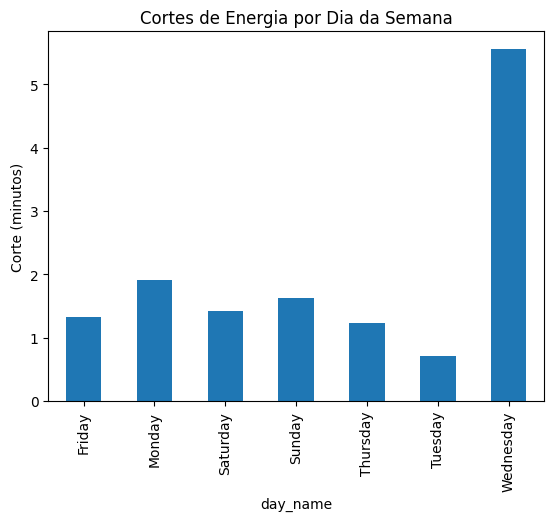

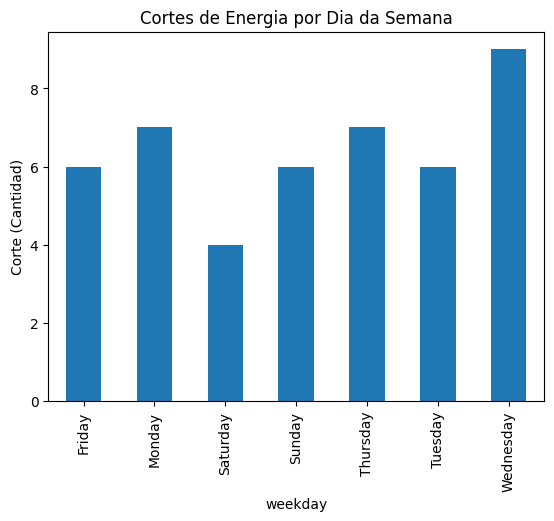

In [40]:
#moment of the week add name of the day
data['day_name'] = data['date'].dt.day_name()
data['day_name'].head()
data.groupby('day_name')['corte'].mean()
data.groupby('day_name')['corte'].mean().plot(kind='bar')
plt.title('Cortes de Energia por Dia da Semana')
plt.ylabel('Corte (minutos)')
plt.show()
data['weekday'] = data['date'].dt.day_name()
data['weekday'].head()
data.groupby('weekday')['corte'].count()
data.groupby('weekday')['corte'].count().plot(kind='bar')
plt.title('Cortes de Energia por Dia da Semana')
plt.ylabel('Corte (Cantidad)')
plt.show()

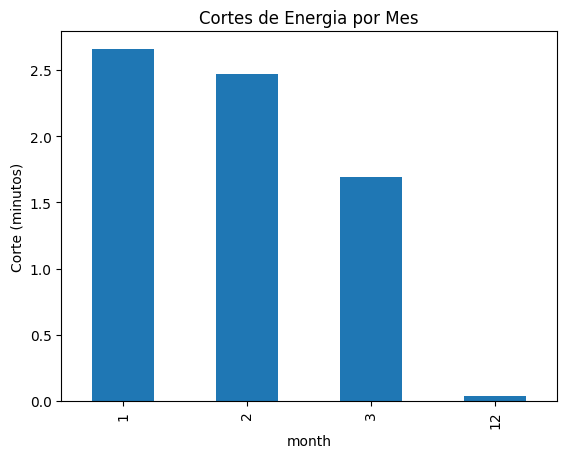

In [41]:
#moment of the month
data['month'] = data['date'].dt.month
data['month'].head()
data.groupby('month')['corte'].mean()
data.groupby('month')['corte'].mean().plot(kind='bar')
plt.title('Cortes de Energia por Mes')
plt.ylabel('Corte (minutos)')
plt.show()

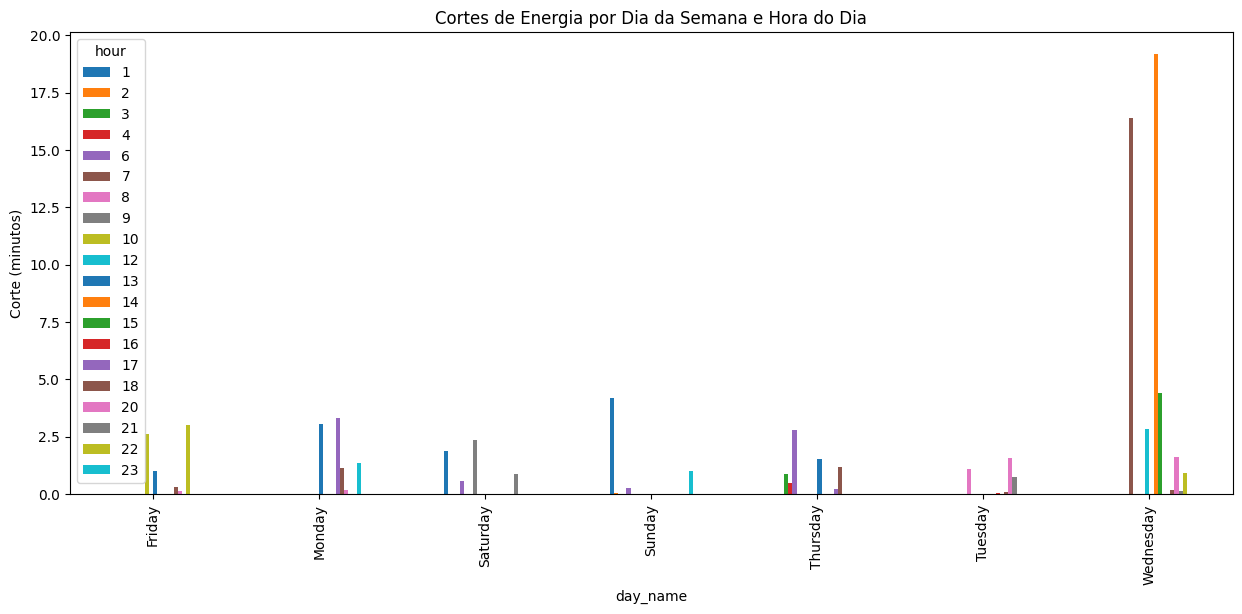

In [42]:
#is any relation between the day of the week and the hour of the day?
data.groupby(['day_name', 'hour'])['corte'].mean()
data.groupby(['day_name', 'hour'])['corte'].mean().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Cortes de Energia por Dia da Semana e Hora do Dia')
plt.ylabel('Corte (minutos)')
plt.show()


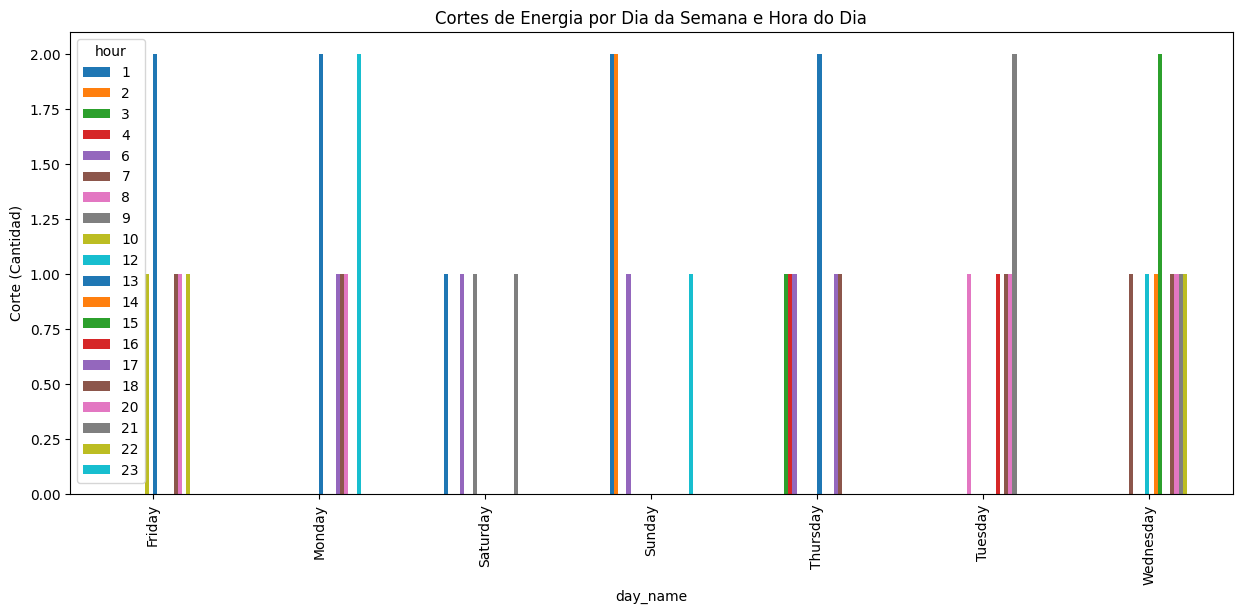

In [43]:
#is any relation between the day of the week and the hour of the day?
data.groupby(['day_name', 'hour'])['corte'].count()
data.groupby(['day_name', 'hour'])['corte'].count().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Cortes de Energia por Dia da Semana e Hora do Dia')
plt.ylabel('Corte (Cantidad)')
plt.show()

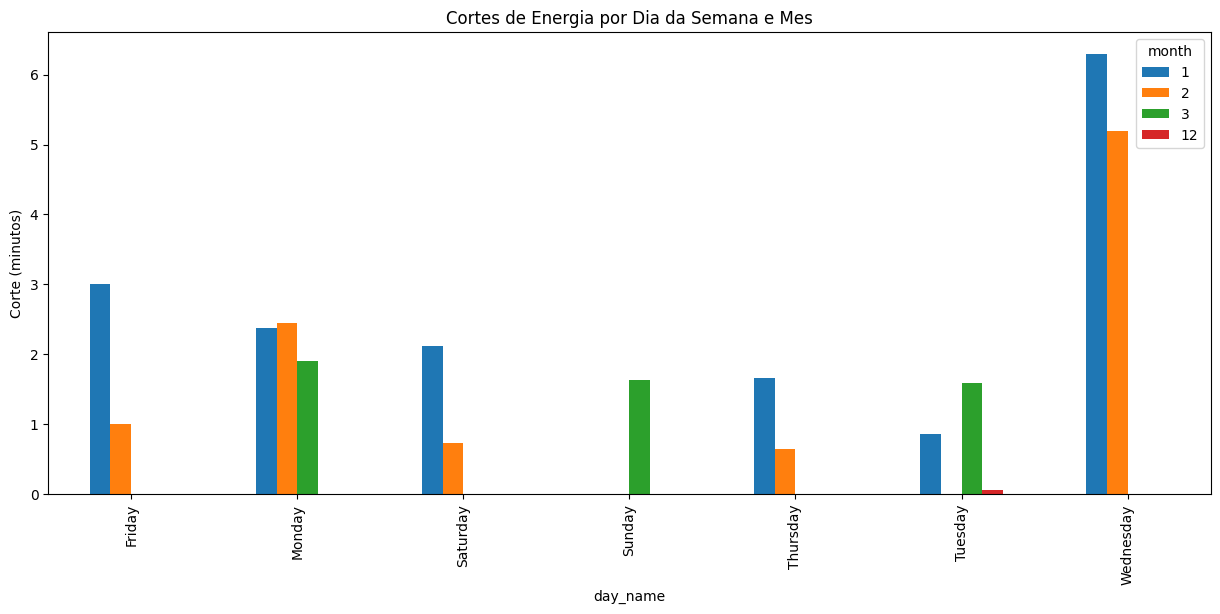

In [44]:
#relation between the day of the week and the month
data.groupby(['day_name', 'month'])['corte'].mean()
data.groupby(['day_name', 'month'])['corte'].mean().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Cortes de Energia por Dia da Semana e Mes')
plt.ylabel('Corte (minutos)')
plt.show()

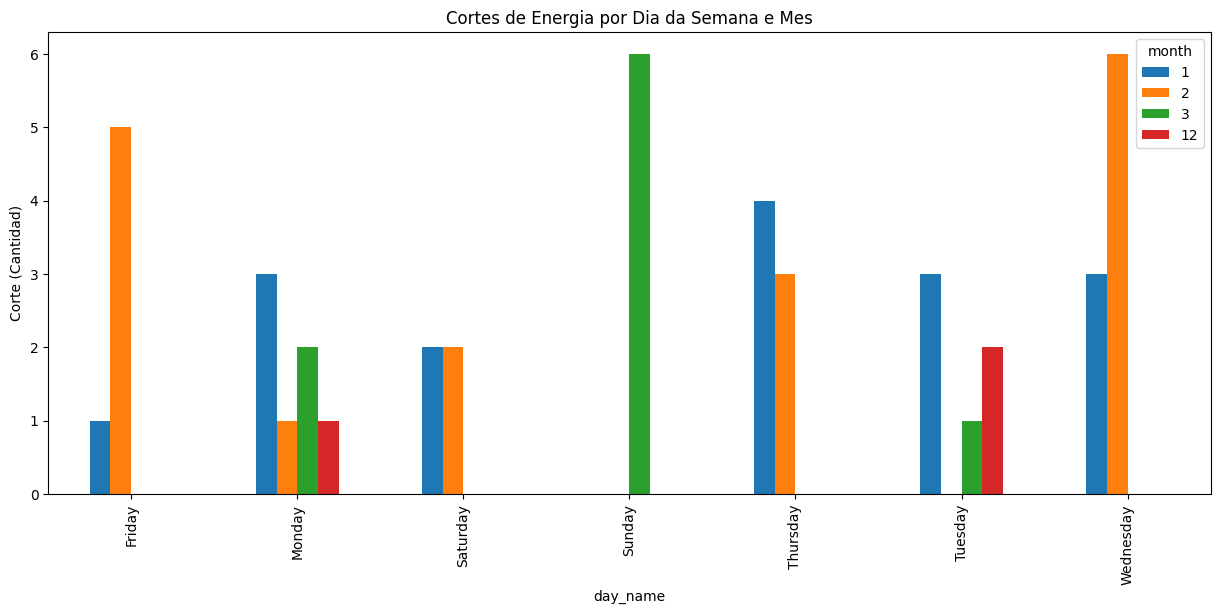

In [45]:
#relation between the day of the week and the month
data.groupby(['day_name', 'month'])['corte'].count()
data.groupby(['day_name', 'month'])['corte'].count().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Cortes de Energia por Dia da Semana e Mes')
plt.ylabel('Corte (Cantidad)')
plt.show()

In [61]:
#correration between the hour, day of the week and the month with the corte
pd.pivot_table(data, 
               values='corte', 
               index='day_name', 
               columns='month', 
               aggfunc='count').style.background_gradient(cmap='Blues')


month,1,2,3,12
day_name,,,,
Friday,1.000000,5.000000,nan,nan
Monday,3.000000,1.000000,2.000000,1.000000
Saturday,2.000000,2.000000,nan,nan
Sunday,nan,nan,6.000000,nan
Thursday,4.000000,3.000000,nan,nan
Tuesday,3.000000,nan,1.000000,2.000000
Wednesday,3.000000,6.000000,nan,nan
